# 2.코로나 바이러스

## 2-1. 문제 정의 및 가설 수립
* 문제 정의: 국가별 코로나 바이러스 현황 분석
* 가설 수립: 미국과 유럽 쪽이 확진자가 제일 많을 것이다.

## 2-2. 데이터 가져오기

In [1]:
# !kaggle datasets download -d imdevskp/corona-virus-report

In [2]:
# !tar -xvf corona-virus-report.zip -C corona_data

## 2-3.데이터 로드하기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('corona_data/covid_19_clean_complete.csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## 2-4.데이터 살펴보기

In [5]:
df.shape

(49068, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [8]:
min(df['Date']), max(df['Date'])

('2020-01-22', '2020-07-27')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [10]:
df.columns = ['지역','국가','위도','경도','일자','확진자','사망자','회복자','치료중','WHO']
df.head()

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## 2-5. EDA(탐색적 데이터 분석)

### 1.대한민국 코로나 현황

In [11]:
koreaDF = df[df['국가'].str.contains('Korea')]
koreaDF.head()

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
141,NaN,South Korea,35.907757,127.766922,2020-01-22,1,0,0,1,Western Pacific
402,NaN,South Korea,35.907757,127.766922,2020-01-23,1,0,0,1,Western Pacific
663,NaN,South Korea,35.907757,127.766922,2020-01-24,2,0,0,2,Western Pacific
924,NaN,South Korea,35.907757,127.766922,2020-01-25,2,0,0,2,Western Pacific
1185,NaN,South Korea,35.907757,127.766922,2020-01-26,3,0,0,3,Western Pacific


In [12]:
koreaDF.reset_index(inplace = True)
koreaDF.head()

,index,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
0,141,NaN,South Korea,35.907757,127.766922,2020-01-22,1,0,0,1,Western Pacific
1,402,NaN,South Korea,35.907757,127.766922,2020-01-23,1,0,0,1,Western Pacific
2,663,NaN,South Korea,35.907757,127.766922,2020-01-24,2,0,0,2,Western Pacific
3,924,NaN,South Korea,35.907757,127.766922,2020-01-25,2,0,0,2,Western Pacific
4,1185,NaN,South Korea,35.907757,127.766922,2020-01-26,3,0,0,3,Western Pacific


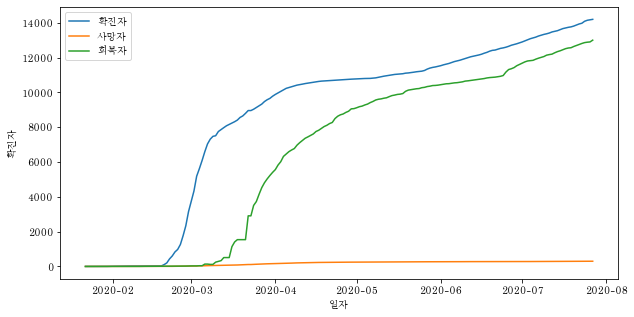

In [13]:
plt.figure(figsize = (10,5))
sns.lineplot(x = '일자',y= '확진자', data = koreaDF)
sns.lineplot(x = '일자',y= '사망자', data = koreaDF)
sns.lineplot(x = '일자',y= '회복자', data = koreaDF)
plt.legend(['확진자','사망자','회복자'])

### 2. 국가별 코로나 현황 분석

In [14]:
latestDF = df[df['일자'] == max(df['일자'])]
latestDF.head()

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [15]:
sortedDF = latestDF.sort_values(by = '확진자',ascending = False)
sortedDF.head(10)

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
49030,NaN,US,40.000000,-100.000000,2020-07-27,4290259,148011,1325804,2816444,Americas
48835,NaN,Brazil,-14.235000,-51.925300,2020-07-27,2442375,87618,1846641,508116,Americas
48936,NaN,India,20.593684,78.962880,2020-07-27,1480073,33408,951166,495499,South-East Asia
48992,NaN,Russia,61.524010,105.318756,2020-07-27,816680,13334,602249,201097,Europe
49005,NaN,South Africa,-30.559500,22.937500,2020-07-27,452529,7067,274925,170537,Africa
48963,NaN,Mexico,23.634500,-102.552800,2020-07-27,395489,44022,303810,47657,Americas
48986,NaN,Peru,-9.190000,-75.015200,2020-07-27,389717,18418,272547,98752,Americas
48854,NaN,Chile,-35.675100,-71.543000,2020-07-27,347923,9187,319954,18782,Americas
49028,NaN,United Kingdom,55.378100,-3.436000,2020-07-27,300111,45759,0,254352,Europe
48938,NaN,Iran,32.427908,53.688046,2020-07-27,293606,15912,255144,22550,Eastern Mediterranean


<AxesSubplot:xlabel='국가', ylabel='확진자'>

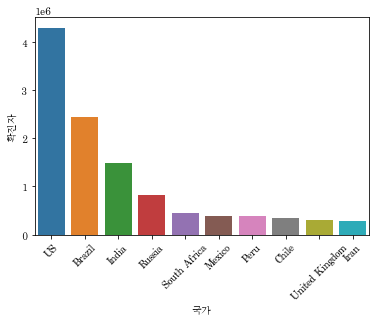

In [16]:
plt.xticks(rotation = 45)
sns.barplot(x = '국가', y = '확진자', data = sortedDF.head(10))

In [17]:
# 전세계 확진자 현황
globalDF = df.groupby('일자')[['확진자','사망자','회복자']].sum()
globalDF.head()

,확진자,사망자,회복자
일자,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


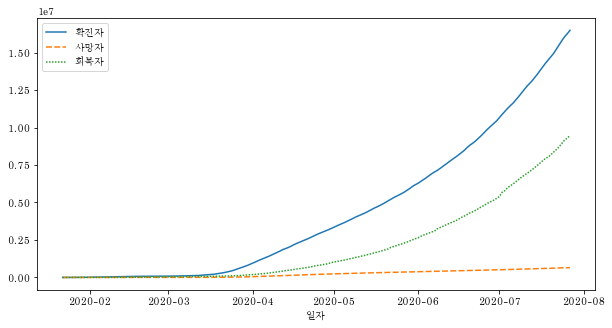

In [27]:
plt.figure(figsize = (10,5))
sns.lineplot(data = globalDF)
plt.show()

## 3. folium 사용하기 
* 파이썬 기반의 지도 시각화 라이브러리
* http://python-visualization.github.io/folium/

In [19]:
# !pip install folium

In [20]:
import folium
m = folium.Map()
m

In [30]:
m = folium.Map(location = [37.342080734070336, 126.8314857117612],zoom_start = 30)
m

In [22]:
#Marker 추가
m = folium.Map(location = [37.342080734070336, 126.8314857117612],zoom_start = 20)
folium.CircleMarker([37.342080734070336, 126.8314857117612],radius = 179,color = 'red',fill = True, fill_color = "orange").add_to(m)
m

In [23]:
#Pop Up
m = folium.Map(location = [37.342080734070336, 126.8314857117612],zoom_start = 20)
folium.CircleMarker([37.342080734070336, 126.8314857117612],radius = 179,color = 'red',fill = True, fill_color = "orange",popup = "디미고").add_to(m)
m

In [24]:
latestDF.loc[48807, '위도'], latestDF.loc[48807, '경도'], latestDF.loc[48807, '확진자']

(33.93911, 67.709953, 36263)

In [25]:
latestDF

,지역,국가,위도,경도,일자,확진자,사망자,회복자,치료중,WHO
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [26]:
m = folium.Map(location = [0,0], zoom_start =2)
for n in latestDF.index:
    folium.CircleMarker(location = [latestDF.loc[n,"위도"],latestDF.loc[n,"경도"]], 
                       radius = latestDF.loc[n,"확진자"]/69000,
                        color = "red",
                        fill = "True",
                        popup = latestDF.loc[n,"국가"] + ":" + str(latestDF.loc[n,"확진자"])
                       ).add_to(m)
m